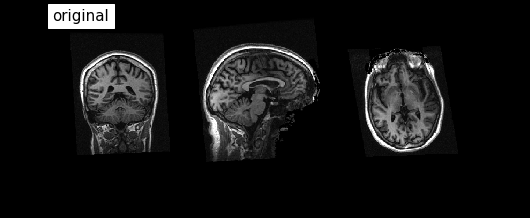

In [1]:
from nilearn.plotting import plot_anat
%matplotlib inline
import matplotlib.pyplot as plt
plot_anat('/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz', title='original',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

In [2]:
%%bash

FILENAME=/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w

bet ${FILENAME}.nii.gz /output/sub-01_ses-test_T1w_bet.nii.gz
    # Created the output file in the output folder

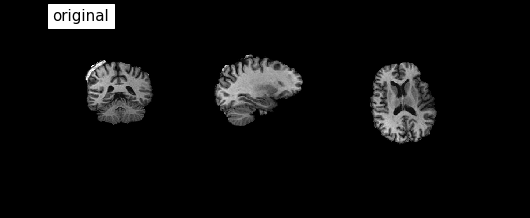

In [3]:
plot_anat('/output/sub-01_ses-test_T1w_bet.nii.gz', title = 'original', display_mode = 'ortho', dim = -1, 
          draw_cross = False, annotate = False);

In [4]:
!bet -h


Usage:    bet <input> <output> [options]

Main bet2 options:
  -o          generate brain surface outline overlaid onto original image
  -m          generate binary brain mask
  -s          generate approximate skull image
  -n          don't generate segmented brain image output
  -f <f>      fractional intensity threshold (0->1); default=0.5; smaller values give larger brain outline estimates
  -g <g>      vertical gradient in fractional intensity threshold (-1->1); default=0; positive values give larger brain outline at bottom, smaller at top
  -r <r>      head radius (mm not voxels); initial surface sphere is set to half of this
  -c <x y z>  centre-of-gravity (voxels not mm) of initial mesh surface.
  -t          apply thresholding to segmented brain image and mask
  -e          generates brain surface as mesh in .vtk format

Variations on default bet2 functionality (mutually exclusive options):
  (default)   just run bet2
  -R          robust brain centre estimation (iterates BE

We could see that we can generate a binary brain mask with BET (as a result of the skull-strip). It can be useful for masking our GLM analysis. 

In [5]:
%%bash

FILENAME=/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w

bet ${FILENAME}.nii.gz /output/sub-01_ses-test_T1w_bet.nii.gz -m

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


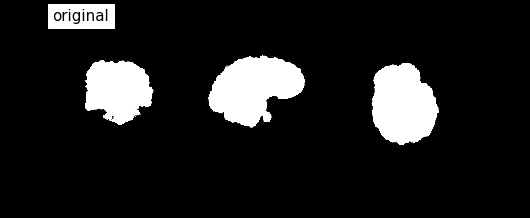

In [6]:
plot_anat('/output/sub-01_ses-test_T1w_bet_mask.nii.gz', title='original',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

## BET in the Nipype framework

Now, how can we run BET in the Nipype framework?

First thing first, we need to import the ``BET`` class from Nipype's `interfaces` module

In [7]:
from nipype.interfaces.fsl import BET

In [8]:
skullstrip = BET() # created an object (BET이라는 함수들을 담은 틀을 사용해서 skullstrip이라는 계산기를 만듦)

In [9]:
skullstrip.inputs.in_file = "/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz"
skullstrip.inputs.out_file = "/output/T1w_nipype_bet.nii.gz"
res = skullstrip.run()

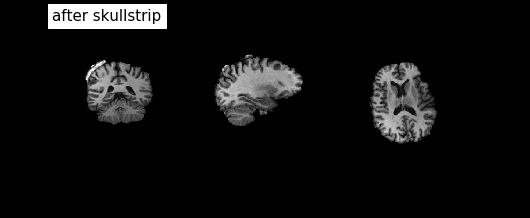

In [10]:
plot_anat('/output/T1w_nipype_bet.nii.gz', 
          title = 'after skullstrip',
          display_mode = 'ortho',
          dim = -1,
         draw_cross = False,
         annotate = False);

In [15]:
print(skullstrip.cmdline)

bet /data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz /output/T1w_nipype_bet.nii.gz


In [16]:
# Let's use the keyword arguments to set the inputs of an object when you construct an instance of the BET class.
skullstrip = BET(in_file="/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz",
                 out_file="/output/T1w_nipype_bet.nii.gz",
                 mask=True)
res = skullstrip.run()

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


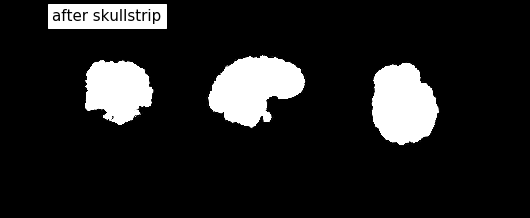

In [17]:
plot_anat('/output/T1w_nipype_bet_mask.nii.gz', title='after skullstrip',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

In [19]:
res.outputs.mask_file

'/home/neuro/nipype_tutorial/Practices/Basics/T1w_nipype_bet_mask.nii.gz'

In [20]:
from nipype.interfaces.fsl import IsotropicSmooth

In [21]:
IsotropicSmooth.help()

Wraps command **fslmaths**

Use fslmaths to spatially smooth an image with a gaussian kernel.

Inputs::

	[Mandatory]
	fwhm: (a float)
		fwhm of smoothing kernel [mm]
		flag: -s %.5f, position: 4
		mutually_exclusive: sigma
	in_file: (an existing file name)
		image to operate on
		flag: %s, position: 2
	sigma: (a float)
		sigma of smoothing kernel [mm]
		flag: -s %.5f, position: 4
		mutually_exclusive: fwhm

	[Optional]
	args: (a unicode string)
		Additional parameters to the command
		flag: %s
	environ: (a dictionary with keys which are a bytes or None or a value
		 of class 'str' and with values which are a bytes or None or a value
		 of class 'str', nipype default value: {})
		Environment variables
	internal_datatype: ('float' or 'char' or 'int' or 'short' or 'double'
		 or 'input')
		datatype to use for calculations (default is float)
		flag: -dt %s, position: 1
	nan2zeros: (a boolean)
		change NaNs to zeros before doing anything
		flag: -nan, position: 3
	out_file: (a file name)
	

In [24]:
smoothing = IsotropicSmooth(in_file = '/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz',
                           fwhm = 4,
                           out_file = "/output/T1w_nipype_smooth.nii.gz")
smoothing.run()

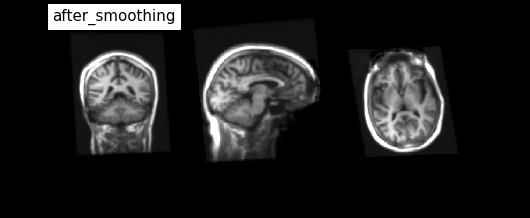

In [26]:
plot_anat("/output/T1w_nipype_smooth.nii.gz", title = "after_smoothing",
         display_mode='ortho', dim=-1, draw_cross=False, annotate=False);